<a href="https://colab.research.google.com/github/SunilKumarSingh84/Keras/blob/main/TF_Keras_Autoregressive_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.optimizers import SGD, Adam

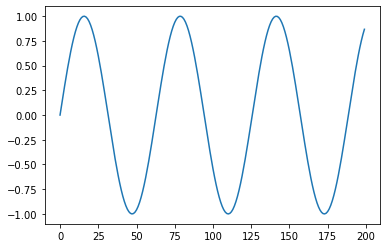

In [21]:
#Synthetic data
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [22]:
T=10
D=1
X=[]
Y=[]

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1) # data should be NxTxD
Y = np.array(Y)
N = len(X)

print("X.shape:", X.shape, "Y.shape", Y.shape)

X.shape: (190, 10, 1) Y.shape (190,)


In [27]:
#try autoregressive SimpleRNN
i = Input(shape=(T,1))
x = SimpleRNN(5, activation='relu')(i) #default activation is not none for RNN, it is tanh
x = Dense(1)(x)

model = Model(i,x)
model.compile(loss='mse', optimizer = Adam(lr=0.1))

r= model.fit(X[:N//2], Y[:N//2], epochs=80, validation_data= (X[N//2:], Y[N//2:]))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
3/3 [==============================] - 1s 120ms/step - loss: 0.2127 - val_loss: 0.1693
Epoch 2/80
3/3 [==============================] - 0s 18ms/step - loss: 0.1338 - val_loss: 0.1033
Epoch 3/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0605 - val_loss: 0.0198
Epoch 4/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0166 - val_loss: 0.0404
Epoch 5/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0259 - val_loss: 0.0398
Epoch 6/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0157 - val_loss: 0.0105
Epoch 7/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0121 - val_loss: 0.0075
Epoch 8/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0076 - val_loss: 0.0097
Epoch 9/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 10/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0061 - val_loss: 0.0027
Epoch 11/80
3/3 [===========

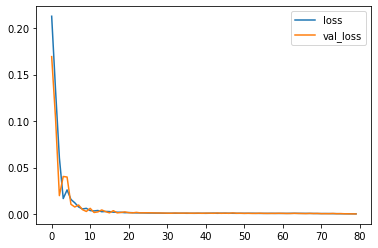

In [28]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [29]:
validation_target = Y[N//2:]
validation_predictions = []

last_x = X[N//2]  #1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1, 1))[0,0] #1x1 array scalar

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

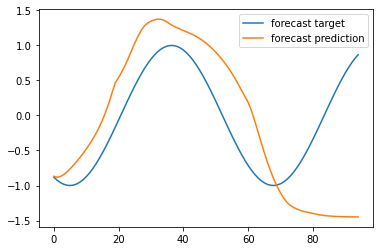

In [30]:
plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()